In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [148]:
df = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')

In [149]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [150]:
# Drop the 'No' columns since it is just an index column

df = df.drop(columns = ['No'])
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [151]:
# Number of rows and columns

df.shape

(35064, 17)

Data has 35064 rows and 17 columns

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
year       35064 non-null int64
month      35064 non-null int64
day        35064 non-null int64
hour       35064 non-null int64
PM2.5      34139 non-null float64
PM10       34346 non-null float64
SO2        34129 non-null float64
NO2        34041 non-null float64
CO         33288 non-null float64
O3         33345 non-null float64
TEMP       35044 non-null float64
PRES       35044 non-null float64
DEWP       35044 non-null float64
RAIN       35044 non-null float64
wd         34983 non-null object
WSPM       35050 non-null float64
station    35064 non-null object
dtypes: float64(11), int64(4), object(2)
memory usage: 4.5+ MB


It seems there are some missing values!

In [153]:
df.isnull().sum()

year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

## Handling Missing Values

Let's see if there are any missing values in other than the format of 'NaN' 

In [154]:
# Making a list of missing value types
missing_values = ["n/a", "na", "--"]
df = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv',
                  na_values = missing_values)
df = df.drop(columns = ['No'])
df.isnull().sum()

year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

The number of missing values didn't change, so we can say there are no more null values!

In [155]:
df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Some key insights from this table:

- 75% of the data for some columns (PM2.5, SO2) have values farthest from the maximum, possibility of outliers
- mean value for most of the columns is greater than the median(indicated by 50%)
- we CANNOT just simply replace NaN values with mean because of outliers

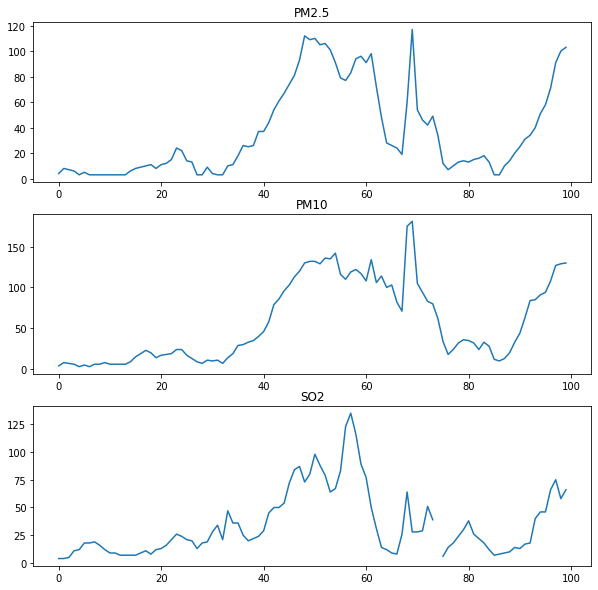

In [156]:
plt.figure(figsize = (10,10))

plt.subplot(3, 1, 1)
plt.plot(df['PM2.5'][:100])
plt.title('PM2.5')

plt.subplot(3, 1, 2)
plt.plot(df['PM10'][:100])
plt.title('PM10')

plt.subplot(3, 1, 3)
plt.plot(df['SO2'][:100])
plt.title('SO2')

plt.show()

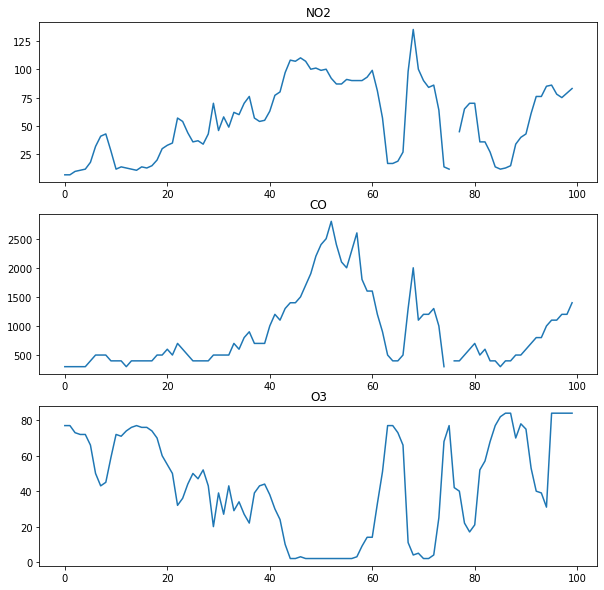

In [157]:
plt.figure(figsize = (10,10))

plt.subplot(3, 1, 1)
plt.plot(df['NO2'][:100])
plt.title('NO2')

plt.subplot(3, 1, 2)
plt.plot(df['CO'][:100])
plt.title('CO')

plt.subplot(3, 1, 3)
plt.plot(df['O3'][:100])
plt.title('O3')

plt.show()

Let's use interpolation to fill the missing values

In [158]:
df['PM2.5'] = df['PM2.5'].interpolate()
df['PM10'] = df['PM10'].interpolate()
df['SO2'] = df['SO2'].interpolate()
df['NO2'] = df['NO2'].interpolate()
df['CO'] = df['CO'].interpolate()
df['O3'] = df['O3'].interpolate()

In [159]:
df.isnull().sum()

year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP       20
PRES       20
DEWP       20
RAIN       20
wd         81
WSPM       14
station     0
dtype: int64

There are still some missing columns but we've dealt with most of them!
Let's look at some of them and try to handle those.

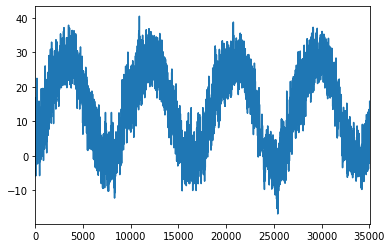

In [168]:
df['TEMP'].plot()

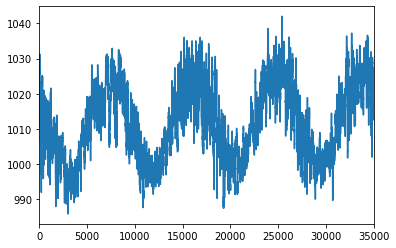

In [169]:
df['PRES'].plot()

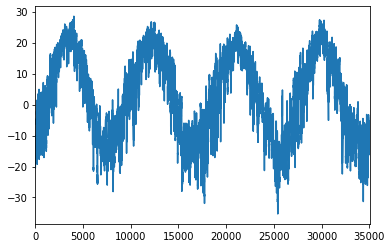

In [170]:
df['DEWP'].plot()

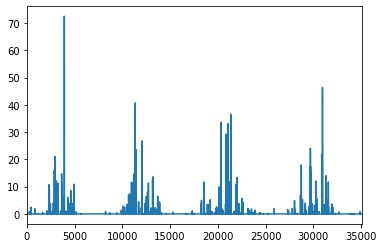

In [186]:
df['RAIN'].plot()

In [176]:
df['wd'].value_counts()

NE     5140
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: wd, dtype: int64

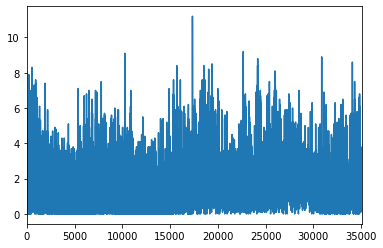

In [174]:
df['WSPM'].plot()

We can interpolate some columns, and drop others.

In [187]:
df['TEMP'] = df['TEMP'].interpolate()
df['DEWP'] = df['DEWP'].interpolate()
df['PRES'] = df['PRES'].interpolate()

df = df.dropna()

In [188]:
df.isnull().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

### Detecting outliers

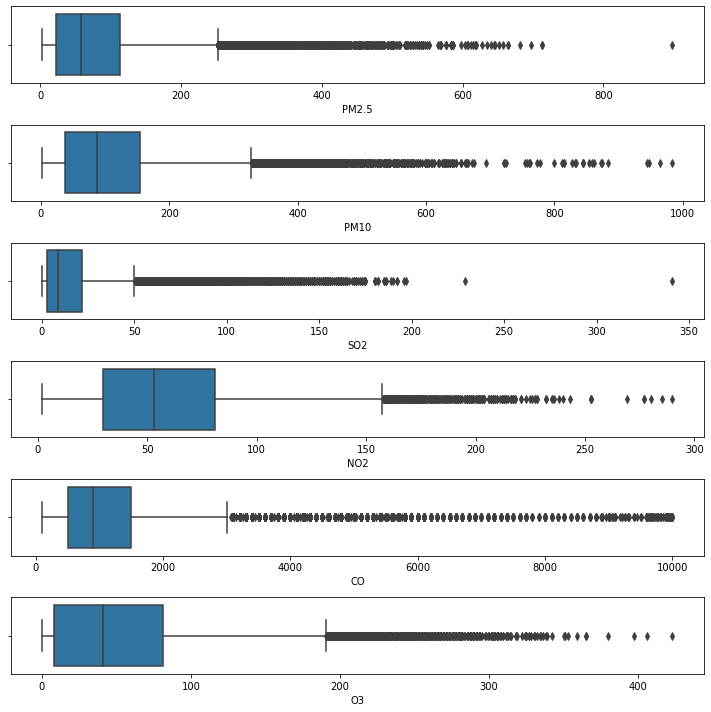

In [189]:
import seaborn as sns
fig, axs = plt.subplots(6, figsize = (10,10))
plt1 = sns.boxplot( df['PM2.5'], ax = axs[0] )
plt2 = sns.boxplot( df['PM10'], ax = axs[1] )
plt3 = sns.boxplot( df['SO2'], ax = axs[2] )
plt4 = sns.boxplot( df['NO2'], ax = axs[3] )
plt5 = sns.boxplot( df['CO'], ax = axs[4] )
plt6 = sns.boxplot( df['O3'], ax = axs[5] )
plt.tight_layout()
plt.show()

Let's see the percentage of data points that lie outside of the range for 'PM2.5' column

In [210]:
len(df.loc[df['PM2.5'] > 250]) / len(df['PM2.5'])

0.04791720273322469

Only 4.7%, therefore we can drop those values!

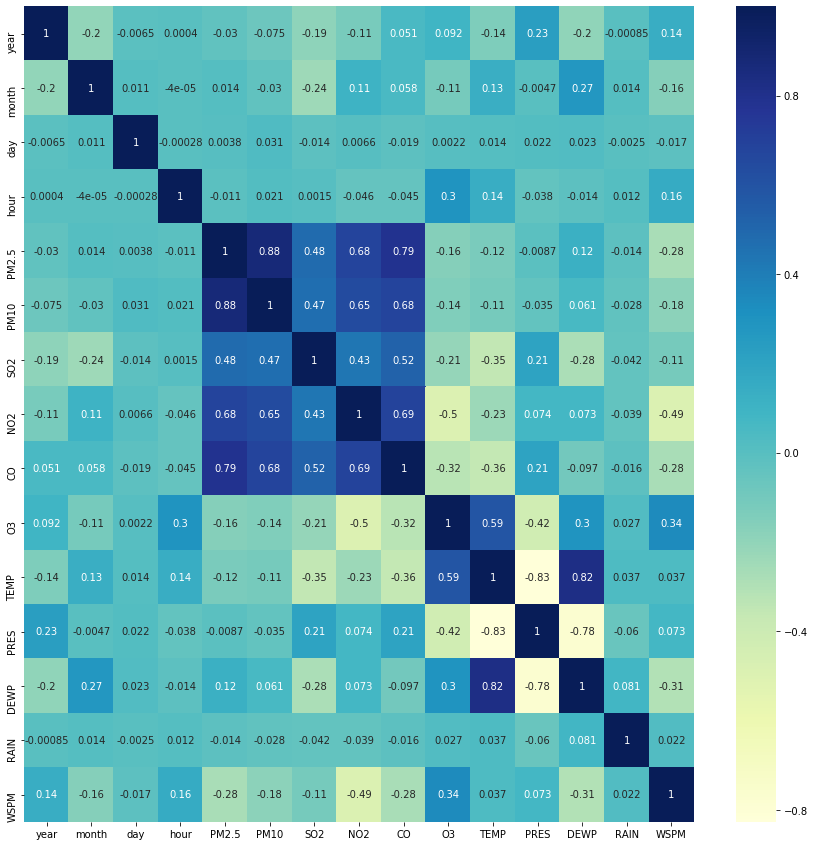

In [190]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

Correlation matrix shows the positive relation between some variables such as 'PM2.5' & 'PM10'

It also shows the inverse relation between 'PRES' and 'TEMP'

Now, let's see the scatter plots of correlated variables

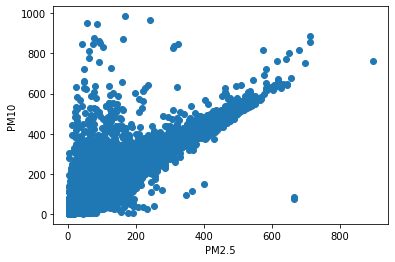

In [192]:
X = df['PM2.5']
Y = df['PM10']
plt.scatter(X, Y)
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.show()

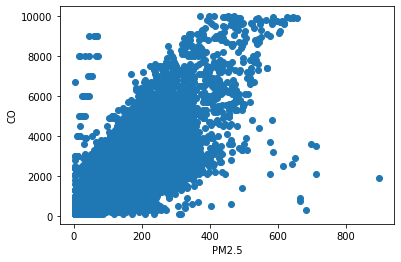

In [194]:
X = df['PM2.5']
Y = df['CO']
plt.scatter(X, Y)
plt.xlabel('PM2.5')
plt.ylabel('CO')
plt.show()

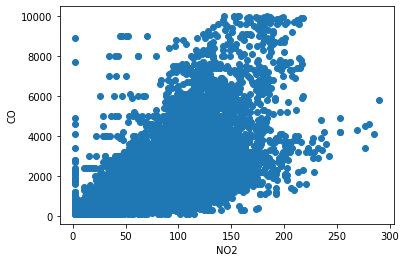

In [195]:
X = df['NO2']
Y = df['CO']
plt.scatter(X, Y)
plt.xlabel('NO2')
plt.ylabel('CO')
plt.show()

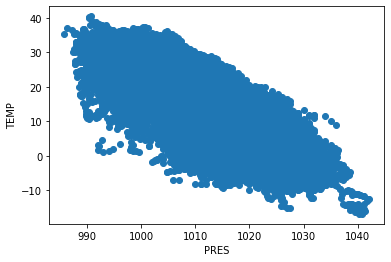

In [197]:
X = df['PRES']
Y = df['TEMP']
plt.scatter(X, Y)
plt.xlabel('PRES')
plt.ylabel('TEMP')
plt.show()

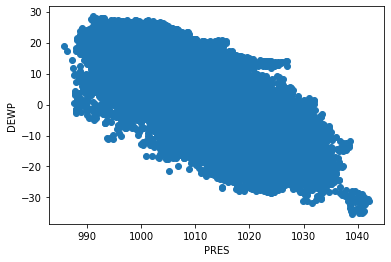

In [198]:
X = df['PRES']
Y = df['DEWP']
plt.scatter(X, Y)
plt.xlabel('PRES')
plt.ylabel('DEWP')
plt.show()